In [31]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [70]:
INITIAL_PROPELANT_WEIGHT = 0.015  #Kg
SAMPLE_RATE = 80
time_constant = 1/SAMPLE_RATE
dataFile = 'motor3.csv'

In [71]:
with open(dataFile, newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

In [72]:
a = np.array(data)
a = a.astype(float)
filtered = a[np.where(a > 0)]

In [73]:
filtered = np.append(filtered, 0)
filtered = np.insert(filtered, 0, 0)
filtered

array([ 0. ,  0.1,  1.7,  3.2,  5.3,  7.6, 11. , 16.8, 25.2, 30.5, 32.9,
       35.4, 38.9, 40.5, 40.6, 41.3, 42.1, 40. , 39. , 38. , 36.8, 37. ,
       36.5, 35.6, 32.6, 31.9, 31.5, 28.7, 26.9, 27. , 27.5, 27.6, 25.4,
       23.9, 21.6, 19. , 15. , 10.4,  6.7,  5.7,  4.5,  1.2,  0. ])

In [74]:
#filtered = np.delete(filtered, [1,2,3,4,10])
burnTime = filtered.size * time_constant

In [75]:
t = np.linspace(0, burnTime, filtered.size)
thrust = 0.00981 * filtered

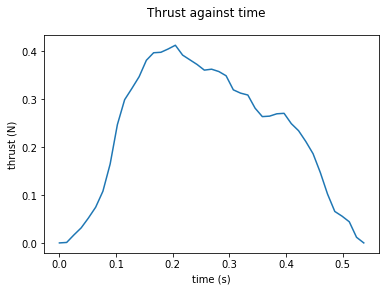

In [76]:
fig = plt.figure()
plt.plot(t, thrust)
fig.suptitle('Thrust against time')
plt.xlabel('time (s)')
plt.ylabel('thrust (N)')
fig.savefig('graph')

In [77]:
#total impulse
totalImpulse = np.sum(thrust) * time_constant
#specific impulse
specificImpulse = totalImpulse / INITIAL_PROPELANT_WEIGHT
#average thrust
avgThrust = totalImpulse / burnTime

In [78]:
def motorClass(totalImpulse):
    if totalImpulse > 5120:
        return 'M'
    elif totalImpulse > 2560:
        return 'L'
    elif totalImpulse > 1280:
        return 'K'
    elif totalImpulse > 640:
        return 'J'
    elif totalImpulse > 320:
        return 'I'
    elif totalImpulse > 160:
        return 'H'
    elif totalImpulse > 80:
        return 'G'
    elif totalImpulse > 40:
        return 'F'
    elif totalImpulse > 20:
        return 'E'
    elif totalImpulse > 10:
        return 'D'
    elif totalImpulse > 5:
        return 'C'
    elif totalImpulse > 2.5:
        return 'B'
    elif totalImpulse > 1.25:
        return 'A'
    elif totalImpulse > 0.625:
        return '1/2A'
    elif totalImpulse > 0.3126:
        return '1/4A'
    else:
        return 'micro'
    
Class = motorClass(totalImpulse)

In [79]:
st = "Total Impulse:\t\t{:.2f}\tN-sec \nSpecific Impulse:\t{:.2f}\tN-sec/Kg \nAverage Thrust:\t\t{:.2f}\tN"
print(st.format(totalImpulse, specificImpulse, avgThrust))
print("Motor Class:\t\t{}".format(Class))

Total Impulse:		0.12	N-sec 
Specific Impulse:	8.20	N-sec/Kg 
Average Thrust:		0.23	N
Motor Class:		micro


In [80]:
#Generate Rasp File
filename = input("Enter rasp file name")
filename = filename + ".eng"
f = open(filename, "a")

In [81]:
motorName = Class + str(int(avgThrust))
diameter = input("Enter Motor Diameter (mm): ")
Length = input("Input motor Length (mm): ")
delays = input("Input motor delays separated by dashes or P(plugged) for none: ")
pWeight = input("Propellant Weight (Kg): ")
totalWeight = input("Motor Total Weight (Kg): ")
manufucturer = "NKJ"

In [82]:
#Write rasp file header
f.write("; NakujaProject" + motorName + "\n")
f.write("; from " + dataFile + "\n")
f.write("{} {} {} {} {} {} {} \n".format(motorName, diameter, Length, delays, pWeight, totalWeight, manufucturer))

35

In [83]:
thrustATime = np.array([t, thrust]).T
np.savetxt(f, thrustATime, delimiter=' ')

In [84]:
f.close()